# OPEN CV Line Detection

https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

In [1]:
# system
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

from config.path import get_training_data_path

import cv2
import numpy as np
import matplotlib.pyplot as plt

Average Angle:  -1.4625762687664114


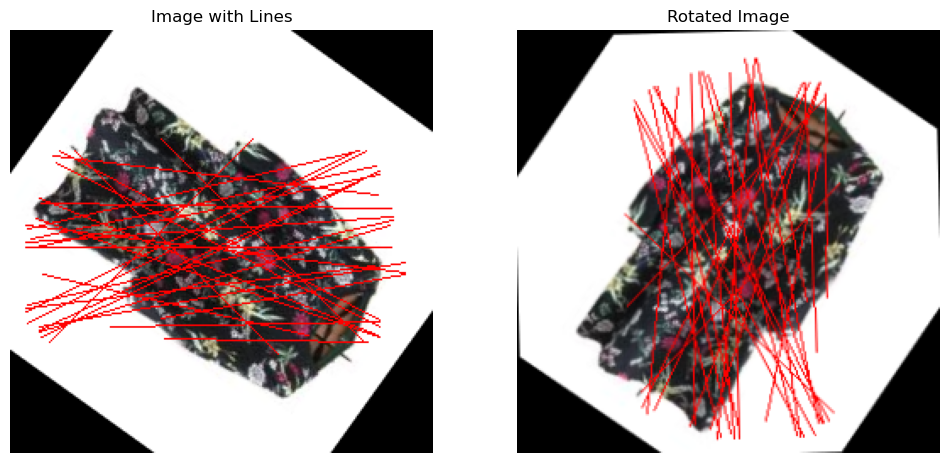

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random 
def correct_rotation_and_display_with_lines(image_path=""):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for displaying
    image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    # Convert to grayscale and equalize histogram
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = cv2.equalizeHist(gray)

    # Define the range of rotation angles
    min_angle = -45
    max_angle = 45

    # Generate a random angle within the specified range
    angle = random.uniform(min_angle, max_angle)

    width, height = image.shape[1], image.shape[0]
    rotation_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), angle, 1)
    image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Detect edges
    edges = cv2.Canny(gray, 100, 150, apertureSize=5)
    
    # Use Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=70, minLineLength=100, maxLineGap=20)

    if lines is not None:
        # Prepare to calculate the average angle
        sin_sum = 0
        cos_sum = 0

        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 1)  # Draw each detected line in red
            angle = np.arctan2(y2 - y1, x2 - x1)
            sin_sum += np.sin(angle)
            cos_sum += np.cos(angle)

        # Calculate average angle using vector sums
        average_angle = np.arctan2(sin_sum, cos_sum)
        average_angle_degrees = np.degrees(average_angle)

        print("Average Angle: ", average_angle_degrees)

        # Rotate image to align
        width, height = image.shape[1], image.shape[0]
        rotation_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), 90-average_angle_degrees, 1)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    else:
        rotated_image = image  # No rotation if no lines are detected

    # Display the original and rotated images using matplotlib
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(image)
    plt.title('Image with Lines')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(rotated_image)
    plt.title('Rotated Image')
    plt.axis('off')

    plt.show()


relative_path = get_training_data_path('classifier', 'dress')

full_path = os.path.join(relative_path, 'dress5.jpg')
correct_rotation_and_display_with_lines(full_path)